In [1]:
import pandas as pd
from pandas import read_excel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error 
import numpy as np

In [2]:
def feature_selec(X, features):
    X_select = np.zeros((X.shape[0], len(features)))
    index = 0
    for i in features:
        for j in range(X.shape[0]):
            X_select[j][index] = X[j][i]
        index+=1
        
    return(X_select)
    
feature_selec(np.array([[1,2,3], [4,5,6], [7,8,9]]), [0])

array([[1.],
       [4.],
       [7.]])

# NEURAL NET MODEL FOR DELAY VALUES

In [3]:
df_delay=pd.read_csv("./data/Delay.csv", sep=",").drop("index", axis=1)
df_delay = shuffle(df_delay)
dataset_delay=df_delay.values
df_delay.head(5)

,lp1,wp1,lp2,wp2,lp3,wp3,lp4,wp4,lp5,wp5,...,ln13,wn13,ln14,wn14,delay_lh_nodeaco,delay_hl_nodeaco,delay_lh_nodebco,delay_hl_nodebco,delay_lh_nodecco,delay_hl_nodecco
14089,2.900000e-08,2.260000e-07,2.400000e-08,8.000000e-08,2.800000e-08,3.120000e-07,3.100000e-08,1.590000e-07,2.300000e-08,1.430000e-07,...,2.800000e-08,2.030000e-07,2.200000e-08,1.070000e-07,1.373030e-11,1.940500e-11,7.835150e-12,2.711160e-11,3.265020e-11,2.619920e-11
5060,2.600000e-08,3.400000e-08,3.200000e-08,3.100000e-08,2.700000e-08,4.400000e-08,3.100000e-08,5.300000e-08,2.600000e-08,2.380000e-07,...,3.000000e-08,7.500000e-08,3.300000e-08,1.880000e-07,7.960970e-12,1.701930e-10,5.700410e-12,9.920380e-11,9.981600e-12,2.209550e-10
2191,2.700000e-08,5.200000e-08,3.100000e-08,3.400000e-08,3.000000e-08,2.010000e-07,2.600000e-08,1.440000e-07,2.600000e-08,1.620000e-07,...,3.000000e-08,7.900000e-08,2.700000e-08,1.170000e-07,9.969430e-12,6.428820e-11,1.180990e-11,2.651550e-11,1.685540e-11,1.075560e-10
30996,2.800000e-08,2.600000e-07,2.500000e-08,2.690000e-07,2.200000e-08,1.440000e-07,3.300000e-08,4.000000e-08,2.200000e-08,1.330000e-07,...,2.600000e-08,1.500000e-07,2.600000e-08,7.200000e-08,1.676050e-11,1.968360e-11,8.820710e-12,1.230240e-10,1.022960e-11,1.566830e-11
28562,2.500000e-08,3.010000e-07,3.100000e-08,8.300000e-08,2.700000e-08,2.360000e-07,2.800000e-08,1.530000e-07,2.200000e-08,8.000000e-08,...,3.200000e-08,3.500000e-08,3.000000e-08,1.780000e-07,1.061990e-11,1.326360e-11,8.278070e-12,2.770670e-11,1.264090e-11,3.251610e-11


In [4]:
X_delay = dataset_delay[:40000,0:56]
y_delay = dataset_delay[:40000,56:]

### Feature Selection

In [5]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

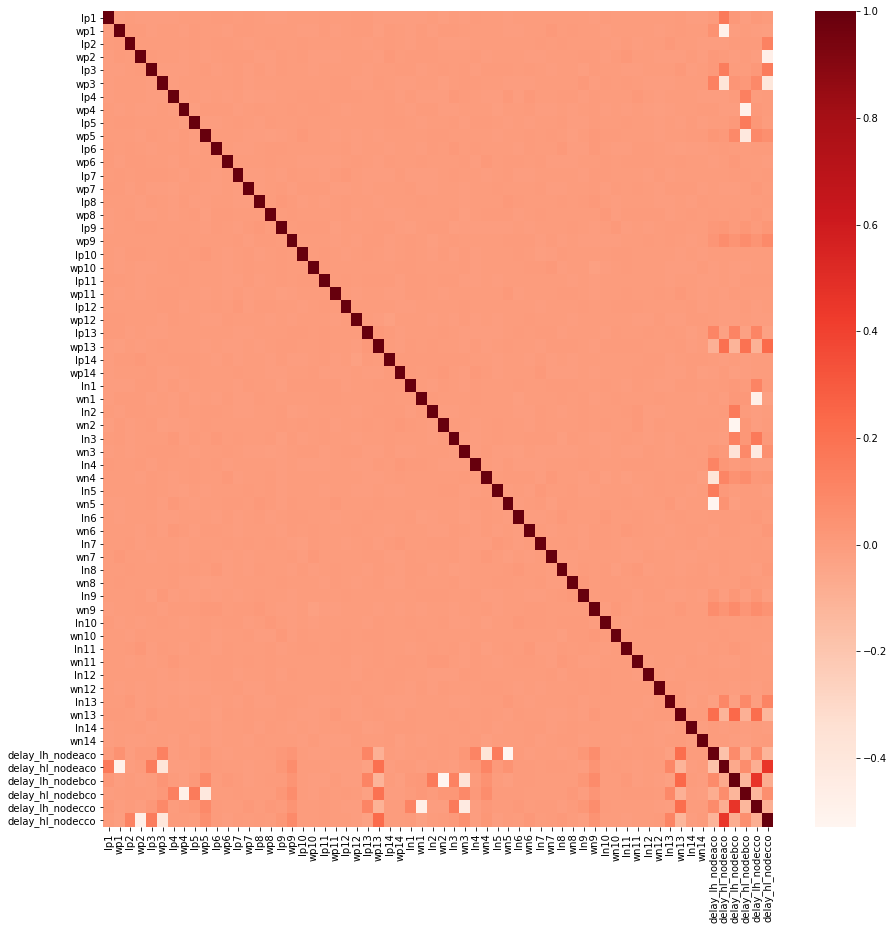

In [6]:
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = df_delay.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [7]:
features_pearson_delay = []
for j in range(6):
    for i in range(56):
        corr, _ = pearsonr(X_delay[:,i], y_delay[:,j])
        if(abs(corr)>0.001):
            if(i not in features_pearson_delay):
                features_pearson_delay.append(i)
#             print(j,i,'Pearsons correlation: %.3f' % abs(corr))
#     print()
    
print(len(features_pearson_delay), features_pearson_delay)

56 [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 52, 53, 54, 7, 13, 22, 32, 43, 51, 49, 55, 18]


In [8]:
features_spearman_delay = []
for j in range(6):
    for i in range(56):
        corr, _ = spearmanr(X_delay[:,i], y_delay[:,j])
        if(abs(corr)>0.001):
            if(i not in features_spearman_delay):
                features_spearman_delay.append(i)
            print(j,i,'Spearmans correlation: %.3f' % abs(corr))
    print()
    
print(len(features_spearman_delay), features_spearman_delay)

0 0 Spearmans correlation: 0.011
0 1 Spearmans correlation: 0.054
0 2 Spearmans correlation: 0.006
0 3 Spearmans correlation: 0.008
0 4 Spearmans correlation: 0.003
0 5 Spearmans correlation: 0.144
0 6 Spearmans correlation: 0.003
0 7 Spearmans correlation: 0.005
0 8 Spearmans correlation: 0.004
0 9 Spearmans correlation: 0.032
0 10 Spearmans correlation: 0.001
0 11 Spearmans correlation: 0.008
0 12 Spearmans correlation: 0.002
0 13 Spearmans correlation: 0.003
0 16 Spearmans correlation: 0.014
0 17 Spearmans correlation: 0.042
0 18 Spearmans correlation: 0.003
0 19 Spearmans correlation: 0.002
0 20 Spearmans correlation: 0.009
0 21 Spearmans correlation: 0.001
0 22 Spearmans correlation: 0.002
0 23 Spearmans correlation: 0.003
0 24 Spearmans correlation: 0.151
0 25 Spearmans correlation: 0.127
0 26 Spearmans correlation: 0.002
0 27 Spearmans correlation: 0.007
0 28 Spearmans correlation: 0.002
0 29 Spearmans correlation: 0.009
0 30 Spearmans correlation: 0.008
0 31 Spearmans correlati

4 52 Spearmans correlation: 0.007
4 53 Spearmans correlation: 0.277
4 54 Spearmans correlation: 0.002
4 55 Spearmans correlation: 0.008

5 0 Spearmans correlation: 0.003
5 1 Spearmans correlation: 0.013
5 2 Spearmans correlation: 0.151
5 3 Spearmans correlation: 0.559
5 4 Spearmans correlation: 0.210
5 5 Spearmans correlation: 0.491
5 6 Spearmans correlation: 0.004
5 8 Spearmans correlation: 0.002
5 9 Spearmans correlation: 0.075
5 10 Spearmans correlation: 0.004
5 11 Spearmans correlation: 0.003
5 12 Spearmans correlation: 0.004
5 13 Spearmans correlation: 0.004
5 14 Spearmans correlation: 0.006
5 15 Spearmans correlation: 0.001
5 16 Spearmans correlation: 0.028
5 17 Spearmans correlation: 0.106
5 18 Spearmans correlation: 0.001
5 19 Spearmans correlation: 0.003
5 20 Spearmans correlation: 0.004
5 21 Spearmans correlation: 0.002
5 22 Spearmans correlation: 0.007
5 23 Spearmans correlation: 0.003
5 24 Spearmans correlation: 0.024
5 25 Spearmans correlation: 0.302
5 26 Spearmans correla

### Creating Training/Validation split

In [9]:
X_delay = feature_selec(X_delay, features_spearman_delay)

In [10]:
scalarX_delay, scalarY_delay = MinMaxScaler(), MinMaxScaler()
scalarX_delay.fit(X_delay)
scalarY_delay.fit(y_delay.reshape(40000,6))
X_delay = scalarX_delay.transform(X_delay)
y_delay = scalarY_delay.transform(y_delay.reshape(40000,6))

### Training the Model

In [11]:
model_delay = Sequential()
model_delay.add(Dense(64, input_dim=56, activation='relu'))
model_delay.add(Dense(96, activation='relu'))
model_delay.add(Dense(128, activation='relu'))
model_delay.add(Dense(256, activation='relu'))
model_delay.add(Dense(128, activation='relu'))
model_delay.add(Dense(64, activation='relu'))
model_delay.add(Dense(32, activation='relu'))
model_delay.add(Dense(16, activation='relu'))
model_delay.add(Dense(6, activation='linear'))
model_delay.compile(loss='mse', optimizer='adam')
output = model_delay.fit(X_delay, y_delay, epochs=1000, verbose=1)

Epoch 1/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0049
Epoch 2/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0027
Epoch 3/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 4/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 5/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0011
Epoch 6/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 9.7691e-04
Epoch 7/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 8.9812e-04
Epoch 8/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 8.3178e-04
Epoch 9/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 8.5550e-04
Epoch 10/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 7.8042e-04
Epoch 11/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 7.3667e-04
Epoch 12/1000
1250/1250 [==============

1250/1250 [==============================] - 2s 1ms/step - loss: 1.5114e-04
Epoch 93/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 1.4853e-04
Epoch 94/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 1.4913e-04
Epoch 95/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 1.5653e-04
Epoch 96/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 1.3969e-04
Epoch 97/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 1.4524e-04
Epoch 98/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 1.4489e-04
Epoch 99/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 1.4773e-04
Epoch 100/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 1.4385e-04
Epoch 101/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 1.4417e-04
Epoch 102/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 1.3883e-04
Epoch 103/1000
1250/1

1250/1250 [==============================] - 3s 2ms/step - loss: 9.0382e-05
Epoch 183/1000
1250/1250 [==============================] - 3s 2ms/step - loss: 9.7566e-05
Epoch 184/1000
1250/1250 [==============================] - 3s 2ms/step - loss: 9.0401e-05
Epoch 185/1000
1250/1250 [==============================] - 3s 2ms/step - loss: 8.8155e-05
Epoch 186/1000
1250/1250 [==============================] - 3s 2ms/step - loss: 8.9914e-05
Epoch 187/1000
1250/1250 [==============================] - 3s 2ms/step - loss: 8.9298e-05
Epoch 188/1000
1250/1250 [==============================] - 3s 2ms/step - loss: 9.2081e-05
Epoch 189/1000
1250/1250 [==============================] - 3s 2ms/step - loss: 9.0023e-05
Epoch 190/1000
1250/1250 [==============================] - 3s 2ms/step - loss: 9.0512e-05
Epoch 191/1000
1250/1250 [==============================] - 3s 2ms/step - loss: 8.7663e-05
Epoch 192/1000
1250/1250 [==============================] - 3s 2ms/step - loss: 8.6996e-05
Epoch 193/1000

1250/1250 [==============================] - 2s 1ms/step - loss: 7.1098e-05
Epoch 273/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 6.3919e-05
Epoch 274/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 6.7081e-05
Epoch 275/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 6.4192e-05
Epoch 276/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 6.8219e-05
Epoch 277/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 7.0298e-05
Epoch 278/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 6.3876e-05
Epoch 279/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 6.5265e-05
Epoch 280/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 6.4905e-05
Epoch 281/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 6.7190e-05
Epoch 282/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 6.1073e-05
Epoch 283/1000

1250/1250 [==============================] - 2s 1ms/step - loss: 5.4173e-05
Epoch 363/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 5.2674e-05
Epoch 364/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 4.8846e-05
Epoch 365/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 5.3108e-05
Epoch 366/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 5.1936e-05
Epoch 367/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 5.2008e-05
Epoch 368/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 5.1382e-05
Epoch 369/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 5.6260e-05
Epoch 370/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 4.7347e-05
Epoch 371/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 5.0824e-05
Epoch 372/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 5.2167e-05
Epoch 373/1000

1250/1250 [==============================] - 2s 2ms/step - loss: 4.5284e-05
Epoch 453/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 4.3092e-05
Epoch 454/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 4.4575e-05
Epoch 455/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 4.4592e-05
Epoch 456/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 4.5718e-05
Epoch 457/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 4.4880e-05
Epoch 458/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 4.4546e-05
Epoch 459/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 4.5177e-05
Epoch 460/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 4.3665e-05
Epoch 461/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 4.4858e-05
Epoch 462/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 4.3574e-05
Epoch 463/1000

1250/1250 [==============================] - 2s 1ms/step - loss: 3.9025e-05
Epoch 543/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.8248e-05
Epoch 544/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.8309e-05
Epoch 545/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.8627e-05
Epoch 546/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.8136e-05
Epoch 547/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.9110e-05
Epoch 548/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 4.0275e-05
Epoch 549/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.8587e-05
Epoch 550/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.9475e-05
Epoch 551/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.8957e-05
Epoch 552/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.7570e-05
Epoch 553/1000

1250/1250 [==============================] - 2s 1ms/step - loss: 3.4969e-05
Epoch 633/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.6213e-05
Epoch 634/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.5533e-05
Epoch 635/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 3.5938e-05
Epoch 636/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.5893e-05
Epoch 637/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 3.5439e-05
Epoch 638/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.5680e-05
Epoch 639/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 3.5451e-05
Epoch 640/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 3.7335e-05
Epoch 641/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.6739e-05
Epoch 642/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.5419e-05
Epoch 643/1000

1250/1250 [==============================] - 1s 1ms/step - loss: 3.1455e-05
Epoch 723/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 3.5822e-05
Epoch 724/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 3.2822e-05
Epoch 725/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.2862e-05
Epoch 726/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.2883e-05
Epoch 727/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.4202e-05
Epoch 728/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.2156e-05
Epoch 729/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.1237e-05
Epoch 730/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.2228e-05
Epoch 731/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.3291e-05
Epoch 732/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.3504e-05
Epoch 733/1000

Epoch 812/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.1008e-05
Epoch 813/1000
1250/1250 [==============================] - 1s 1ms/step - loss: 3.0506e-05
Epoch 814/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.2681e-05
Epoch 815/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.0517e-05
Epoch 816/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.1955e-05
Epoch 817/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.0508e-05
Epoch 818/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.1895e-05
Epoch 819/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.1332e-05
Epoch 820/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.0167e-05
Epoch 821/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.0561e-05
Epoch 822/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.2946e-05

1250/1250 [==============================] - 2s 1ms/step - loss: 2.9987e-05
Epoch 903/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.1043e-05
Epoch 904/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.8327e-05
Epoch 905/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.9413e-05
Epoch 906/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.2413e-05
Epoch 907/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.9341e-05
Epoch 908/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.9633e-05
Epoch 909/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.9171e-05
Epoch 910/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.0416e-05
Epoch 911/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.1502e-05
Epoch 912/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 3.0512e-05
Epoch 913/1000

1250/1250 [==============================] - 2s 1ms/step - loss: 2.7681e-05
Epoch 993/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.9495e-05
Epoch 994/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.8739e-05
Epoch 995/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.8070e-05
Epoch 996/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 2.9488e-05
Epoch 997/1000
1250/1250 [==============================] - 2s 2ms/step - loss: 2.8933e-05
Epoch 998/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.8391e-05
Epoch 999/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.7333e-05
Epoch 1000/1000
1250/1250 [==============================] - 2s 1ms/step - loss: 2.9428e-05


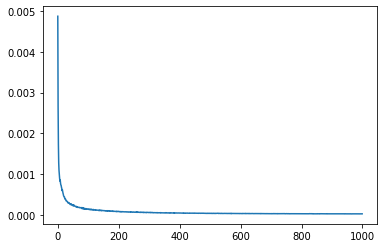

In [12]:
plt.plot(range(0,1000),output.history['loss'])
plt.show()

In [13]:
X_test_delay = dataset_delay[40000:,0:56]
X_test_delay = feature_selec(X_test_delay, features_spearman_delay)
y_test_delay = dataset_delay[40000:,56:]
X_test_delay = scalarX_delay.transform(X_test_delay)

y_trainpred_delay = model_delay.predict(X_delay)
y_trainpred2_delay = scalarY_delay.inverse_transform(y_trainpred_delay)

y_testpred_delay = model_delay.predict(X_test_delay)
y_testpred2_delay = scalarY_delay.inverse_transform(y_testpred_delay)

y_2_delay = scalarY_delay.inverse_transform(y_delay)

### Evaluating the Model

In [14]:
for i in range(6):
    r2_train = r2_score(y_trainpred2_delay[:,i], y_2_delay[:,i])
    r2_test = r2_score(y_testpred2_delay[:,i], y_test_delay[:,i])
    print("Train R2 Score for "+df_delay.columns[56+i]+" : "+str(r2_train))
    print("Test  R2 Score for "+df_delay.columns[56+i]+" : "+str(r2_test))
    print()

Train R2 Score for delay_lh_nodeaco : 0.9966228420442511
Test  R2 Score for delay_lh_nodeaco : 0.9946508918231615

Train R2 Score for delay_hl_nodeaco : 0.9976447255312912
Test  R2 Score for delay_hl_nodeaco : 0.9956030447634986

Train R2 Score for delay_lh_nodebco : 0.9982306602155774
Test  R2 Score for delay_lh_nodebco : 0.9969290101384206

Train R2 Score for delay_hl_nodebco : 0.998163155059004
Test  R2 Score for delay_hl_nodebco : 0.9960181987619302

Train R2 Score for delay_lh_nodecco : 0.9982825879136069
Test  R2 Score for delay_lh_nodecco : 0.99677012203064

Train R2 Score for delay_hl_nodecco : 0.9974640566800499
Test  R2 Score for delay_hl_nodecco : 0.9943786444953105



In [15]:
sum=0
for i in range(10000):
    for j in range(6):        
        error = abs(y_testpred2_delay[i,j] - y_test_delay[i,j])/(y_test_delay[i,j])
        sum+=error
        
print("Mean Test error: {:.2f} %".format(sum/60000 * 100))

Mean Test error: 3.14 %


In [16]:
sum=0
for i in range(40000):
    for j in range(6):        
        error = abs(y_trainpred2_delay[i,j] - y_2_delay[i,j])/(y_2_delay[i,j])
        sum+=error
        
print("Mean Train error: {:.2f} %".format(sum/240000 * 100))

Mean Train error: 2.92 %


# NEURAL NET MODEL FOR LEAKAGE VALUE

In [17]:
df_leakage=pd.read_csv("./data/Leakage.csv", sep=",").drop(["index","vin_a","vin_b","vin_c"], axis=1).reset_index(drop=True)
df_leakage = df_leakage.head(50000)
df_leakage = shuffle(df_leakage)
dataset_leakage=df_leakage.values
df_leakage.head(5)

,lp1,wp1,lp2,wp2,lp3,wp3,lp4,wp4,lp5,wp5,...,wn10,ln11,wn11,ln12,wn12,ln13,wn13,ln14,wn14,leakage
21728,2.300000e-08,2.310000e-07,2.600000e-08,4.400000e-08,2.500000e-08,2.480000e-07,2.300000e-08,1.950000e-07,3.200000e-08,6.100000e-08,...,5.800000e-08,3.200000e-08,1.590000e-07,2.700000e-08,1.680000e-07,2.800000e-08,3.400000e-08,3.000000e-08,2.850000e-07,0.000003
43586,2.900000e-08,2.900000e-07,2.300000e-08,2.720000e-07,2.200000e-08,1.550000e-07,2.800000e-08,2.470000e-07,3.300000e-08,6.100000e-08,...,2.290000e-07,3.200000e-08,2.020000e-07,2.700000e-08,7.800000e-08,2.500000e-08,2.920000e-07,2.800000e-08,1.970000e-07,0.000003
4295,3.300000e-08,9.700000e-08,3.000000e-08,3.220000e-07,2.400000e-08,6.500000e-08,2.700000e-08,1.450000e-07,2.800000e-08,9.400000e-08,...,1.880000e-07,2.700000e-08,3.190000e-07,2.600000e-08,9.200000e-08,2.400000e-08,1.840000e-07,3.100000e-08,9.300000e-08,0.000003
12746,2.400000e-08,1.530000e-07,2.500000e-08,2.840000e-07,2.700000e-08,3.140000e-07,3.300000e-08,3.280000e-07,2.700000e-08,2.300000e-07,...,2.070000e-07,2.600000e-08,2.460000e-07,2.400000e-08,1.100000e-07,3.000000e-08,1.320000e-07,2.400000e-08,3.300000e-07,0.000005
46791,2.400000e-08,2.700000e-07,3.100000e-08,2.610000e-07,3.000000e-08,3.000000e-07,2.200000e-08,9.400000e-08,3.100000e-08,2.520000e-07,...,2.250000e-07,3.000000e-08,8.100000e-08,2.800000e-08,2.920000e-07,2.800000e-08,1.230000e-07,2.600000e-08,1.960000e-07,0.000004


In [18]:
X_leakage = dataset_leakage[:40000,0:56]
y_leakage = dataset_leakage[:40000,56]

In [19]:
scalarX_leakage, scalarY_leakage = MinMaxScaler(), MinMaxScaler()
scalarX_leakage.fit(X_leakage)
scalarY_leakage.fit(y_leakage.reshape(40000,1))
X_leakage = scalarX_leakage.transform(X_leakage)
y_leakage = scalarY_leakage.transform(y_leakage.reshape(40000,1))

### Training the Model

In [20]:
model_leakage = Sequential()
model_leakage.add(Dense(64, input_dim=56, activation='relu'))
model_leakage.add(Dense(96, activation='relu'))
model_leakage.add(Dense(128, activation='relu'))
model_leakage.add(Dense(64, activation='relu'))
model_leakage.add(Dense(32, activation='relu'))
model_leakage.add(Dense(8, activation='relu'))
model_leakage.add(Dense(1, activation='linear'))
model_leakage.compile(loss='mse', optimizer='adam')
output = model_leakage.fit(X_leakage, y_leakage, epochs=300, verbose=1)

Epoch 1/300
1250/1250 [==============================] - 1s 659us/step - loss: 0.0024
Epoch 2/300
1250/1250 [==============================] - 1s 675us/step - loss: 9.1782e-04
Epoch 3/300
1250/1250 [==============================] - 1s 629us/step - loss: 8.1955e-04
Epoch 4/300
1250/1250 [==============================] - 1s 606us/step - loss: 6.7061e-04
Epoch 5/300
1250/1250 [==============================] - 1s 607us/step - loss: 5.3064e-04
Epoch 6/300
1250/1250 [==============================] - 1s 614us/step - loss: 4.2142e-04
Epoch 7/300
1250/1250 [==============================] - 1s 615us/step - loss: 3.3264e-04
Epoch 8/300
1250/1250 [==============================] - 1s 616us/step - loss: 3.1427e-04
Epoch 9/300
1250/1250 [==============================] - 1s 681us/step - loss: 2.6918e-04
Epoch 10/300
1250/1250 [==============================] - 1s 712us/step - loss: 2.4260e-04
Epoch 11/300
1250/1250 [==============================] - 1s 686us/step - loss: 2.0865e-04
Epoch 12/300

1250/1250 [==============================] - 1s 647us/step - loss: 4.9841e-05
Epoch 92/300
1250/1250 [==============================] - 1s 651us/step - loss: 5.0123e-05
Epoch 93/300
1250/1250 [==============================] - 1s 656us/step - loss: 5.0665e-05
Epoch 94/300
1250/1250 [==============================] - 1s 794us/step - loss: 4.8947e-05
Epoch 95/300
1250/1250 [==============================] - 1s 692us/step - loss: 4.8884e-05
Epoch 96/300
1250/1250 [==============================] - 1s 724us/step - loss: 4.8085e-05
Epoch 97/300
1250/1250 [==============================] - 1s 829us/step - loss: 4.9624e-05
Epoch 98/300
1250/1250 [==============================] - 1s 709us/step - loss: 4.8009e-05
Epoch 99/300
1250/1250 [==============================] - 1s 729us/step - loss: 4.7859e-05
Epoch 100/300
1250/1250 [==============================] - 1s 666us/step - loss: 4.7630e-05
Epoch 101/300
1250/1250 [==============================] - 1s 692us/step - loss: 4.9764e-05
Epoch 102/

1250/1250 [==============================] - 1s 619us/step - loss: 3.3492e-05
Epoch 181/300
1250/1250 [==============================] - 1s 619us/step - loss: 3.1848e-05
Epoch 182/300
1250/1250 [==============================] - 1s 621us/step - loss: 3.2607e-05
Epoch 183/300
1250/1250 [==============================] - 1s 622us/step - loss: 3.3360e-05
Epoch 184/300
1250/1250 [==============================] - 1s 573us/step - loss: 3.1609e-05
Epoch 185/300
1250/1250 [==============================] - 1s 580us/step - loss: 3.0559e-05
Epoch 186/300
1250/1250 [==============================] - 1s 642us/step - loss: 3.3316e-05
Epoch 187/300
1250/1250 [==============================] - 1s 639us/step - loss: 3.1665e-05
Epoch 188/300
1250/1250 [==============================] - 1s 643us/step - loss: 3.2097e-05
Epoch 189/300
1250/1250 [==============================] - 1s 644us/step - loss: 3.1242e-05
Epoch 190/300
1250/1250 [==============================] - 1s 640us/step - loss: 3.2175e-05
Ep

1250/1250 [==============================] - 1s 1ms/step - loss: 2.4627e-05
Epoch 270/300
1250/1250 [==============================] - 1s 1ms/step - loss: 2.3616e-05
Epoch 271/300
1250/1250 [==============================] - 1s 1ms/step - loss: 2.3946e-05
Epoch 272/300
1250/1250 [==============================] - 2s 1ms/step - loss: 2.4045e-05
Epoch 273/300
1250/1250 [==============================] - 1s 1ms/step - loss: 2.3695e-05
Epoch 274/300
1250/1250 [==============================] - 2s 1ms/step - loss: 2.2699e-05
Epoch 275/300
1250/1250 [==============================] - 1s 1ms/step - loss: 2.3629e-05
Epoch 276/300
1250/1250 [==============================] - 1s 1ms/step - loss: 2.4754e-05
Epoch 277/300
1250/1250 [==============================] - 1s 1ms/step - loss: 2.3162e-05
Epoch 278/300
1250/1250 [==============================] - 1s 1ms/step - loss: 2.2048e-05
Epoch 279/300
1250/1250 [==============================] - 1s 1ms/step - loss: 2.2255e-05
Epoch 280/300
1250/1250 

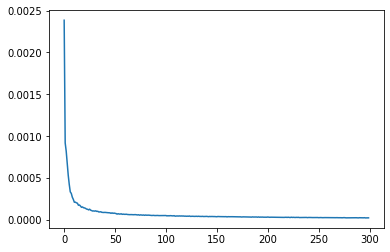

In [21]:
plt.plot(range(0,300),output.history['loss'])
plt.show()

In [22]:
X_test_leakage = dataset_leakage[40000:,0:56]
y_test_leakage = dataset_leakage[40000:,56]
X_test_leakage = scalarX_leakage.transform(X_test_leakage)

y_trainpred_leakage = model_leakage.predict(X_leakage)
y_trainpred2_leakage = scalarY_leakage.inverse_transform(y_trainpred_leakage)

y_testpred_leakage = model_leakage.predict(X_test_leakage)
y_testpred2_leakage = scalarY_leakage.inverse_transform(y_testpred_leakage)

y_2_leakage = scalarY_leakage.inverse_transform(y_leakage)

### Evaluating the Model

In [23]:
for i in range(1):
    r2_train = r2_score(y_trainpred2_leakage, y_2_leakage)
    r2_test = r2_score(y_testpred2_leakage, y_test_leakage)
    print("Train R2 Score for "+df_leakage.columns[56+i]+" : "+str(r2_train))
    print("Test  R2 Score for "+df_leakage.columns[56+i]+" : "+str(r2_test))
    print()

Train R2 Score for leakage : 0.9984630416583528
Test  R2 Score for leakage : 0.9974976419815941



In [24]:
sum=0
for i in range(10000):
    for j in range(1):        
        error = abs(y_testpred2_leakage[i] - y_test_leakage[i])/(y_test_leakage[i])
        sum+=error[0]
        
print("Mean Test error: {:.2f} %".format(sum/10000 * 100))

Mean Test error: 0.57 %


In [25]:
sum=0
for i in range(40000):
    for j in range(1):        
        error = abs(y_trainpred2_leakage[i] - y_2_leakage[i])/(y_2_leakage[i])
        sum+=error[0]
        
print("Mean Train error: {:.2f} %".format(sum/40000 * 100))

Mean Train error: 0.46 %


# PARTICLE SWARM OPTIMISATION ALGORITHM

In [26]:
initial_sizing_delay=[1.1208E-11,1.4759E-11,1.0234E-11,1.5138E-11,1.1430E-11,1.4583E-11]
best_leakage = 2*1.2396e-06
best_delay = np.sum(initial_sizing_delay)*5

print(best_leakage, best_delay)

2.4792e-06 3.8676e-10


### Cost Function

In [33]:
def func1(x_model):
    
    weightfactor = 15000 ### Decides the weight to multiply delay values with
    
    y_pred = [] 
    
    # Calculating cost form Delay function   
    
    x_delay = scalarX_delay.transform(x_model)
    y_delay = model_delay.predict(x_delay)
    y_delay = scalarY_delay.inverse_transform(y_delay)
    
    for j in range(x_model.shape[0]):
        sumis=0
        for i in range(6):
            sumis += weightfactor*y_delay[j][i]
        y_pred.append(sumis)
        
    # Calculating cost form Lekage function 
    
    x_leakage = scalarX_leakage.transform(x_model)
    y_leakage = model_leakage.predict(x_leakage)
    y_leakage = scalarY_leakage.inverse_transform(y_leakage)
    
    for j in range(x_model.shape[0]):
        y_pred[j] = y_pred[j] + y_leakage[j][0]    

    return y_pred

### PSO Run, Tune c1, c2, w

In [34]:
from pyswarms.single.global_best import GlobalBestPSO

# instatiate the optimizer

x_max = 33 * (10 ** -9) * np.ones(56)
for i in range(56):
    if(i%2!=0):
        x_max[i] = x_max[i] * 10        
x_min = 22 * ( 10 ** -9) * np.ones(56)
bounds = (x_min, x_max)

# Hyperparameters

options = {'c1': 0.9, 'c2': 0.01, 'w': 0.7}
optimizer = GlobalBestPSO(n_particles=500, dimensions=56, options=options, bounds=bounds)

# now run the optimization, pass a=1 and b=100 as a tuple assigned to args

cost, pos = optimizer.optimize(func1,500)

2020-08-29 00:55:56,021 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.9, 'c2': 0.01, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=5.27e-6
2020-08-29 00:56:30,312 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.273295184612947e-06, best pos: [2.46567638e-08 1.61192971e-07 2.74461028e-08 1.49090503e-07
 2.70118529e-08 2.03901547e-07 3.07453396e-08 1.19709036e-07
 2.69998278e-08 1.01073725e-07 3.07029364e-08 9.47613184e-08
 2.28791674e-08 1.05891120e-07 2.62399271e-08 1.94728978e-07
 3.28100648e-08 1.44733778e-07 2.97439218e-08 1.58771141e-07
 2.96281326e-08 4.64557310e-08 2.87507417e-08 1.62229615e-07
 2.87647120e-08 1.74388786e-07 2.85576208e-08 2.59025435e-07
 3.10975083e-08 7.08757507e-08 3.29724029e-08 4.66193880e-08
 3.15974090e-08 3.08809627e-08 2.77111283e-08 1.57156959e-07
 2.99782193e-08 1.00935635e-07 2.59815050e-08 1.24916209e-07
 2.71759799e-08 2.36393322e-07 2.74499284e-08 1.10927447e-07
 

### Check results of the Run

In [35]:
X_pso = pos.tolist()

X_pso= np.array(X_pso)
X_pso = np.expand_dims(X_pso, axis=0)

print("L and W values:\n")
print(X_pso[0])
print()

# Get corresponding delay values
X_scaled_pso_delay = scalarX_delay.transform(X_pso)
y_predicted_pso_delay = model_delay.predict(X_scaled_pso_delay)
y_scaled_prediced_pso_delay = scalarY_delay.inverse_transform(y_predicted_pso_delay)

print("Delay values:",y_scaled_prediced_pso_delay[0].tolist())
print("SUM is:",np.sum(y_scaled_prediced_pso_delay[0]))
print("PERCENTAGE DECREASE:", 100 -(np.sum(y_scaled_prediced_pso_delay[0])/7.7352e-11)*100)

x_factor_delay=[]
for i in range(6):
    x_factor_delay.append(int(y_scaled_prediced_pso_delay[0].tolist()[i] / initial_sizing_delay[i]))
    
print("Integer times of initial sizing: ",x_factor_delay)
print()

# Get corresponding leakage values
X_scaled_pso_leakage = scalarX_leakage.transform(X_pso)
y_predicted_pso_leakage = model_leakage.predict(X_scaled_pso_leakage)
y_scaled_prediced_pso_leakage = scalarY_leakage.inverse_transform(y_predicted_pso_leakage)
print("Leakage value:",y_scaled_prediced_pso_leakage[0][0])
print("PERCENTAGE DECREASE:", 100 - 100 *y_scaled_prediced_pso_leakage[0][0]/1.2396e-06)

L and W values:

[2.46567638e-08 1.61192971e-07 2.74461028e-08 1.49090503e-07
 2.70118529e-08 2.03901547e-07 3.07453396e-08 1.19709036e-07
 2.69998278e-08 1.01073725e-07 3.07029364e-08 9.47613184e-08
 2.28791674e-08 1.05891120e-07 2.62399271e-08 1.94728978e-07
 3.28100648e-08 1.44733778e-07 2.97439218e-08 1.58771141e-07
 2.96281326e-08 4.64557310e-08 2.87507417e-08 1.62229615e-07
 2.87647120e-08 1.74388786e-07 2.85576208e-08 2.59025435e-07
 3.10975083e-08 7.08757507e-08 3.29724029e-08 4.66193880e-08
 3.15974090e-08 3.08809627e-08 2.77111283e-08 1.57156959e-07
 2.99782193e-08 1.00935635e-07 2.59815050e-08 1.24916209e-07
 2.71759799e-08 2.36393322e-07 2.74499284e-08 1.10927447e-07
 2.76466870e-08 8.64623411e-08 2.95456095e-08 7.13686057e-08
 2.45224209e-08 2.31667976e-08 2.61475643e-08 2.21527936e-07
 2.62690755e-08 1.50251537e-07 2.94659194e-08 9.08136088e-08]

Delay values: [7.613239205728206e-11, 2.1856747314807912e-11, 1.9984921703630754e-11, 4.251413110445412e-11, 1.5340423376031254

### Find best among all the runs

In [129]:
if(y_scaled_prediced_pso_leakage[0][0] + np.sum(y_scaled_prediced_pso_delay[0])<best_leakage +best_delay):
    print("NEW BEST FOUND")
    best_X = X_pso[0]
    best_delay_vector = y_scaled_prediced_pso_delay[0]
    best_leakage = y_scaled_prediced_pso_leakage[0][0]
    best_delay = np.sum(y_scaled_prediced_pso_delay[0])
print("BEST X:\n")
print(best_X)
print()
print("BEST LEAKAGE:",best_leakage)
print("PERCENTAGE DECREASE:", 100 - 100 *best_leakage/1.2396e-06)
print()
print("BEST DELAY:",best_delay_vector.tolist())
print("SUM IS:",best_delay)
print("PERCENTAGE DECREASE:", 100 -(best_delay/7.7352e-11)*100)

NEW BEST FOUND
BEST X:

[2.28494026e-08 1.92036635e-07 2.30192760e-08 1.03397490e-07
 2.21858353e-08 1.32540606e-07 2.44125279e-08 1.46028801e-07
 2.21589445e-08 1.34588414e-07 2.65556615e-08 3.33928746e-08
 2.49412220e-08 3.97777558e-08 2.64460065e-08 4.22147822e-08
 2.46332057e-08 4.95334191e-08 2.82114508e-08 3.74180079e-08
 2.54882745e-08 2.75066085e-08 2.69814787e-08 2.99293270e-08
 2.35011707e-08 6.44580710e-08 2.90479480e-08 7.89820256e-08
 2.40245742e-08 3.11372618e-07 2.27678599e-08 2.33155573e-07
 2.38150790e-08 1.19245937e-07 2.33142312e-08 8.17103475e-08
 2.43343689e-08 2.92337312e-07 3.10056271e-08 1.00289008e-07
 2.85193740e-08 2.02267111e-07 2.94393613e-08 1.51544589e-07
 2.69037428e-08 3.68934320e-08 2.82816654e-08 2.10395719e-07
 3.04585782e-08 9.99505879e-08 2.49598738e-08 1.99162562e-07
 2.26850909e-08 9.62158792e-08 2.90021702e-08 4.37342467e-08]

BEST LEAKAGE: 1.3509002e-06
PERCENTAGE DECREASE: -8.97872056564492

BEST DELAY: [5.592054597158835e-12, 1.10301854455707